<a href="https://colab.research.google.com/github/KSK123123/AIFFEL_quest_cr/blob/master/MainQuest/QUEST02/MainQuest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

슝=3


In [4]:
import os
csv_path = "sample_data/Pokemon.csv"  # 경로 설정
original_data = pd.read_csv(csv_path)  # 데이터 불러오기

슝=3


In [5]:
pokemon = original_data.copy()  # 데이터셋, poketmon 변수에 복사
print(pokemon.shape)
pokemon.head()
# 앞서 확인했던 데이터 속성을 확인할 수 있다.
# 특이사항으로는 캐글에서 확인하지 못한 Generation, Legendary 속성이 추가되어있는 것을 알 수 있다.

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
# 전설의 포켓몬 데이터셋 생성
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
# pokemon 리스트 내 pokemon["Legendary"]라는 속성의 값이 True일 경우에만 legendary에 할당
# reset_index(drop=True): 기존의 인덱스를 제거하고, 0부터 시작하는 새로운 인덱스를 부여
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [7]:
# 일반 포켓몬의 데이터셋 생성
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
# 결측치 확인(isnull()메서드)
pokemon.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


**type2에만 386개의 결측치 확인**

In [10]:
# 속성 확인
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')




*  #: 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. `int`
* Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) `str`
* Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. `str`
* Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. `str`
* Total : 전체 6가지 스탯의 총합. `int`
* HP : 포켓몬의 체력. `int`
* Attack : 물리 공격력. (scratch, punch 등) `int`
* Defense : 물리 공격에 대한 방어력. `int`
* Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) `int`
* Sp. Def : 특수 공격에 대한 방어력. `int`
* Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) `int`
* Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. `int`
* Legendary : 전설의 포켓몬 여부.  Target feature  `bool`





In [11]:
# 가장 첫번째 컬럼 ㅇ확인
len(set(pokemon["#"]))

721

**이전에 전체 데이터는 800개라고 확인했었는데\
인덱스를 확인해보면 721까지만 있다.**

In [12]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


**인덱스 6의 포켓몬(Charizard)의 경우 버전이 나뉜다.\
이래서 전체 데이터보다 인덱스 값이 낮은 것.**

In [14]:
# 총 몇종류의 포켓몬 이름이 있는지 확인
len(set(pokemon["Name"]))

800

In [15]:
# 아무거나 속성값들 확인해보기
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [17]:
# 타입 확인
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [20]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

**nan == 모두 같은 세트의 데이터가 들어가 있음을 알 수 있다!!**

In [22]:
# 어떤 타입이 들어가있는지 확인
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Poison', 'Ground', 'Rock', 'Ghost', 'Bug', 'Fire', 'Fairy', 'Steel', 'Dragon', 'Normal', 'Water', 'Flying', 'Fighting', 'Dark', 'Grass', 'Electric', 'Ice', 'Psychic']


In [23]:
# 아까
pokemon["Type 2"].isna().sum()

386

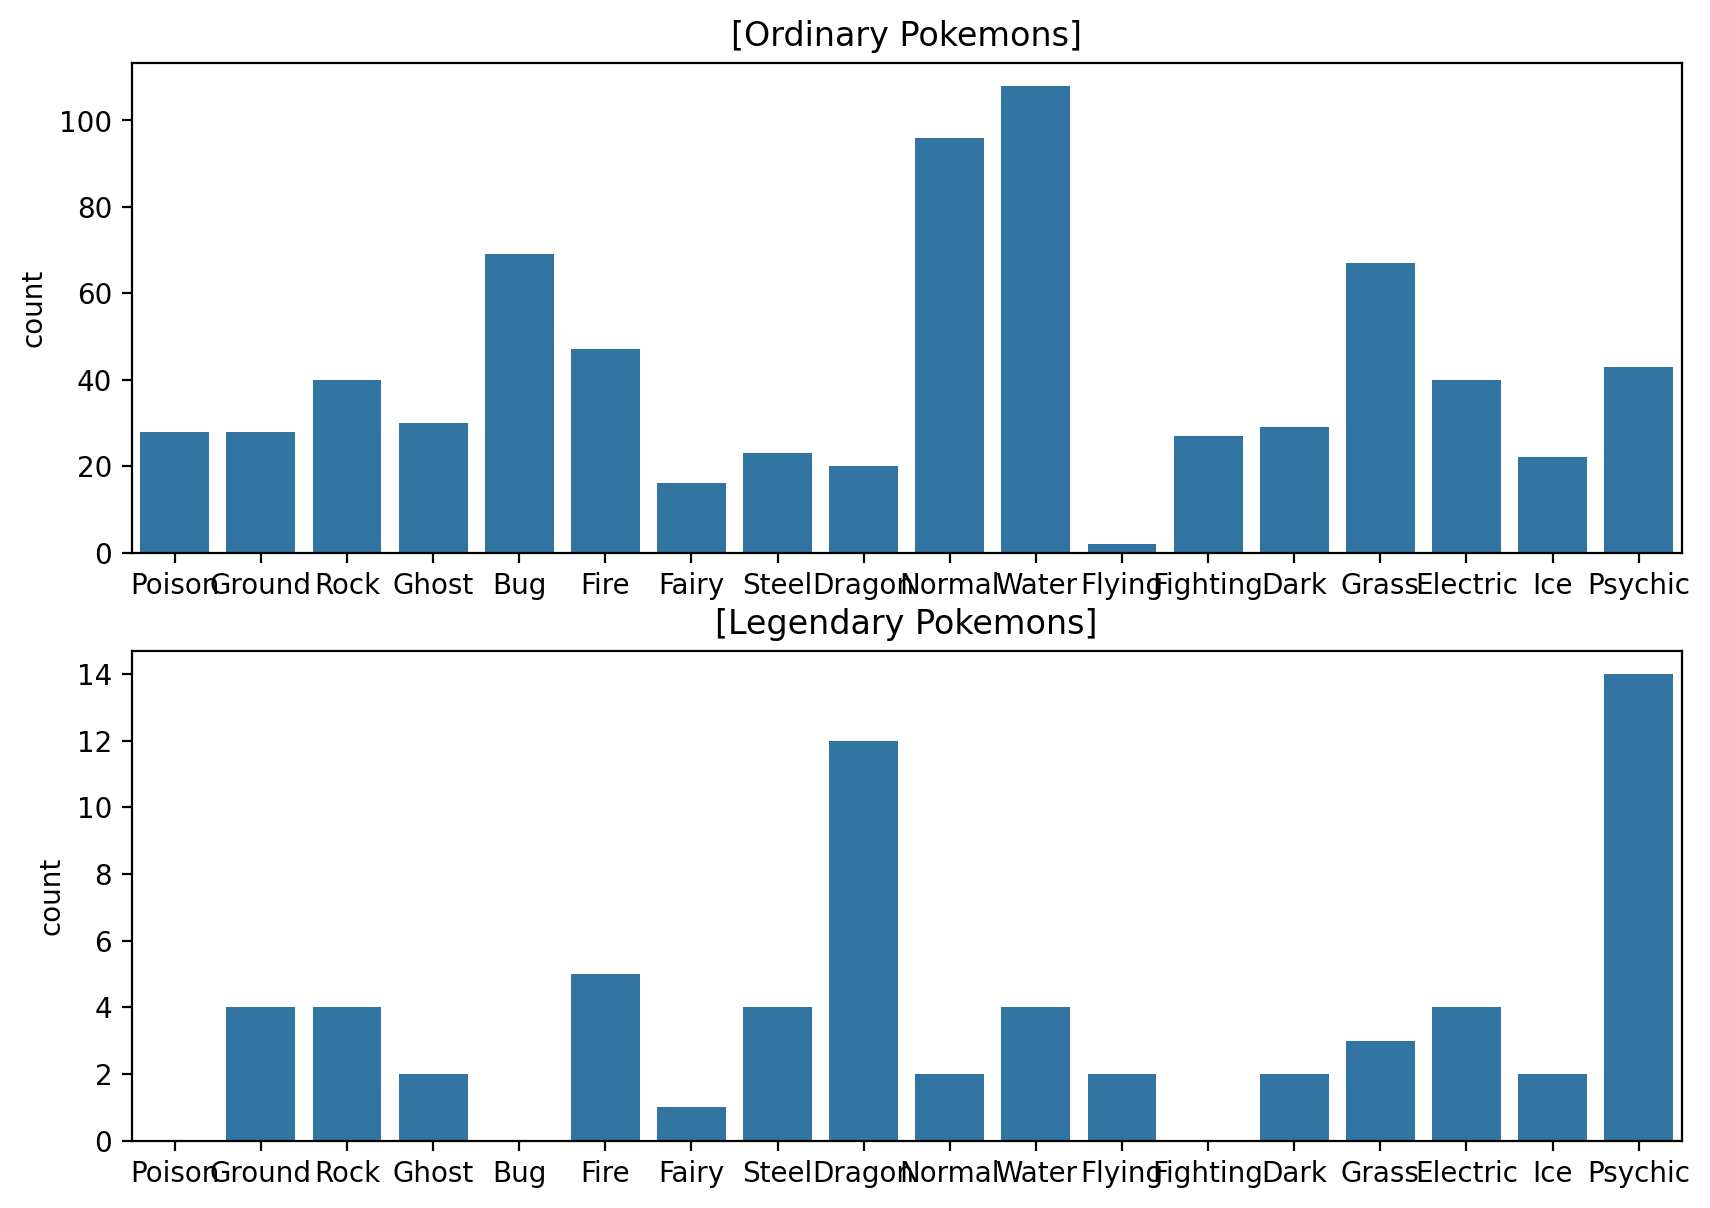

In [24]:
# 일반 포켓몬과 전설 포켓몬의 속성 분포를 먼저 확인해보자

plt.figure(figsize=(10, 7))

plt.subplot(211)
sns.countplot(data = ordinary, x = "Type 1", order = types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 1", order = types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

**분포의 차이가 확연히 보인다!!**

In [26]:
# pivot table로 각 속성에 전설 포켓몬이 얼마나 있는지 확인
pd.pivot_table(pokemon, index = "Type 1", values = "Legendary").sort_values(by=["Legendary"], ascending = False)
# sort_values는 높은 것부터 낮은 순으로 정렬

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


**여기서 주목해야할 점!**\
위에서 봤던 그래프와 수치가 다르다고 생각할 수 있는데\
해당 수치는 각 타입별로 나타낸 전설포켓몬의 비율이다.

예를 들어 Flying의 속성을 갖는 모든 포켓몬 중 전설 포켓몬의 비율이
무려 50%나 됨을 알 수 있다!



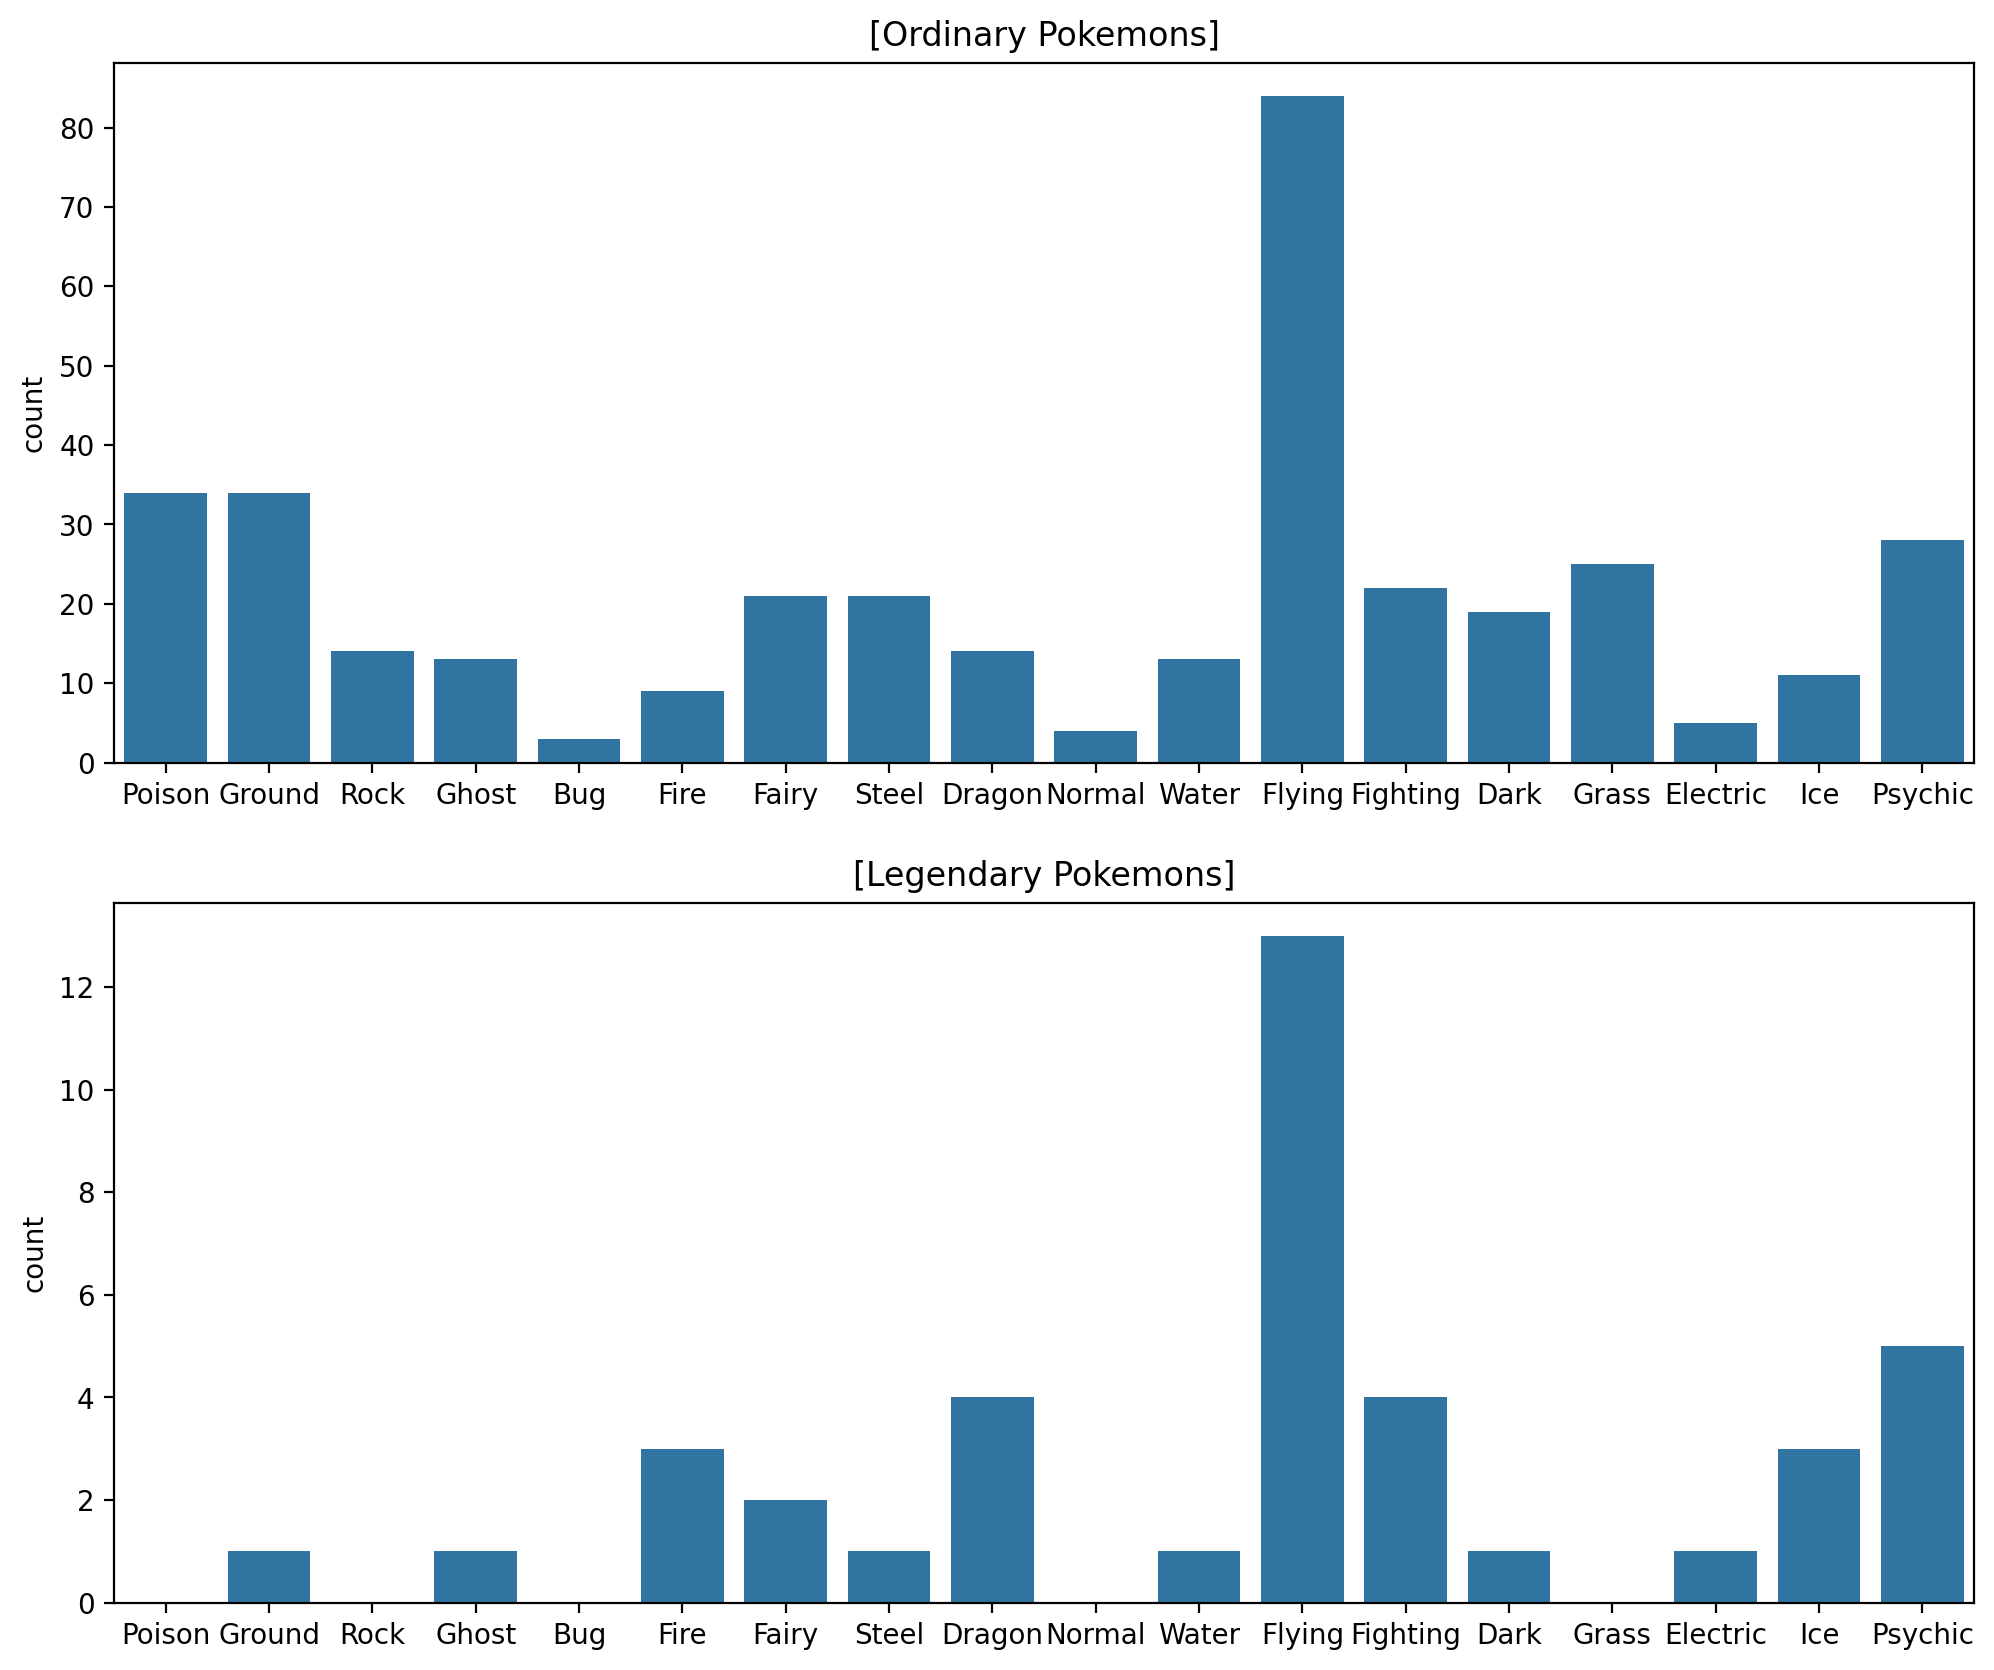

In [29]:
# 이번엔 Type 2의 분포 확인
plt.figure(figsize = (12, 10))

plt.subplot(211)
sns.countplot(data = ordinary, x = "Type 2", order = types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 2", order = types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [28]:
# pivot table로 각 속성에 전설 포켓몬이 얼마나 있는지 확인
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [30]:
# 각 스탯 확인
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [31]:
# 6개의 스탯의 총합과 "Total"값이 제대로 맞는지 확인
# 우선 첫번째 포켓몬부터 확인

print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


맞긴함

In [34]:
# 이제 전체적으로 확인해보자
'''
count = 0
for i in range(len(pokemon)):
    if int(pokemon.loc[i, "Total"]) == sum(list(pokemon.loc[i, stats])):
        count += 1

print(count)
'''
# => sum()함수 사용
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

800 값 확인\
=> **모든 total값에 이상이 없음을 알 수 있다.**

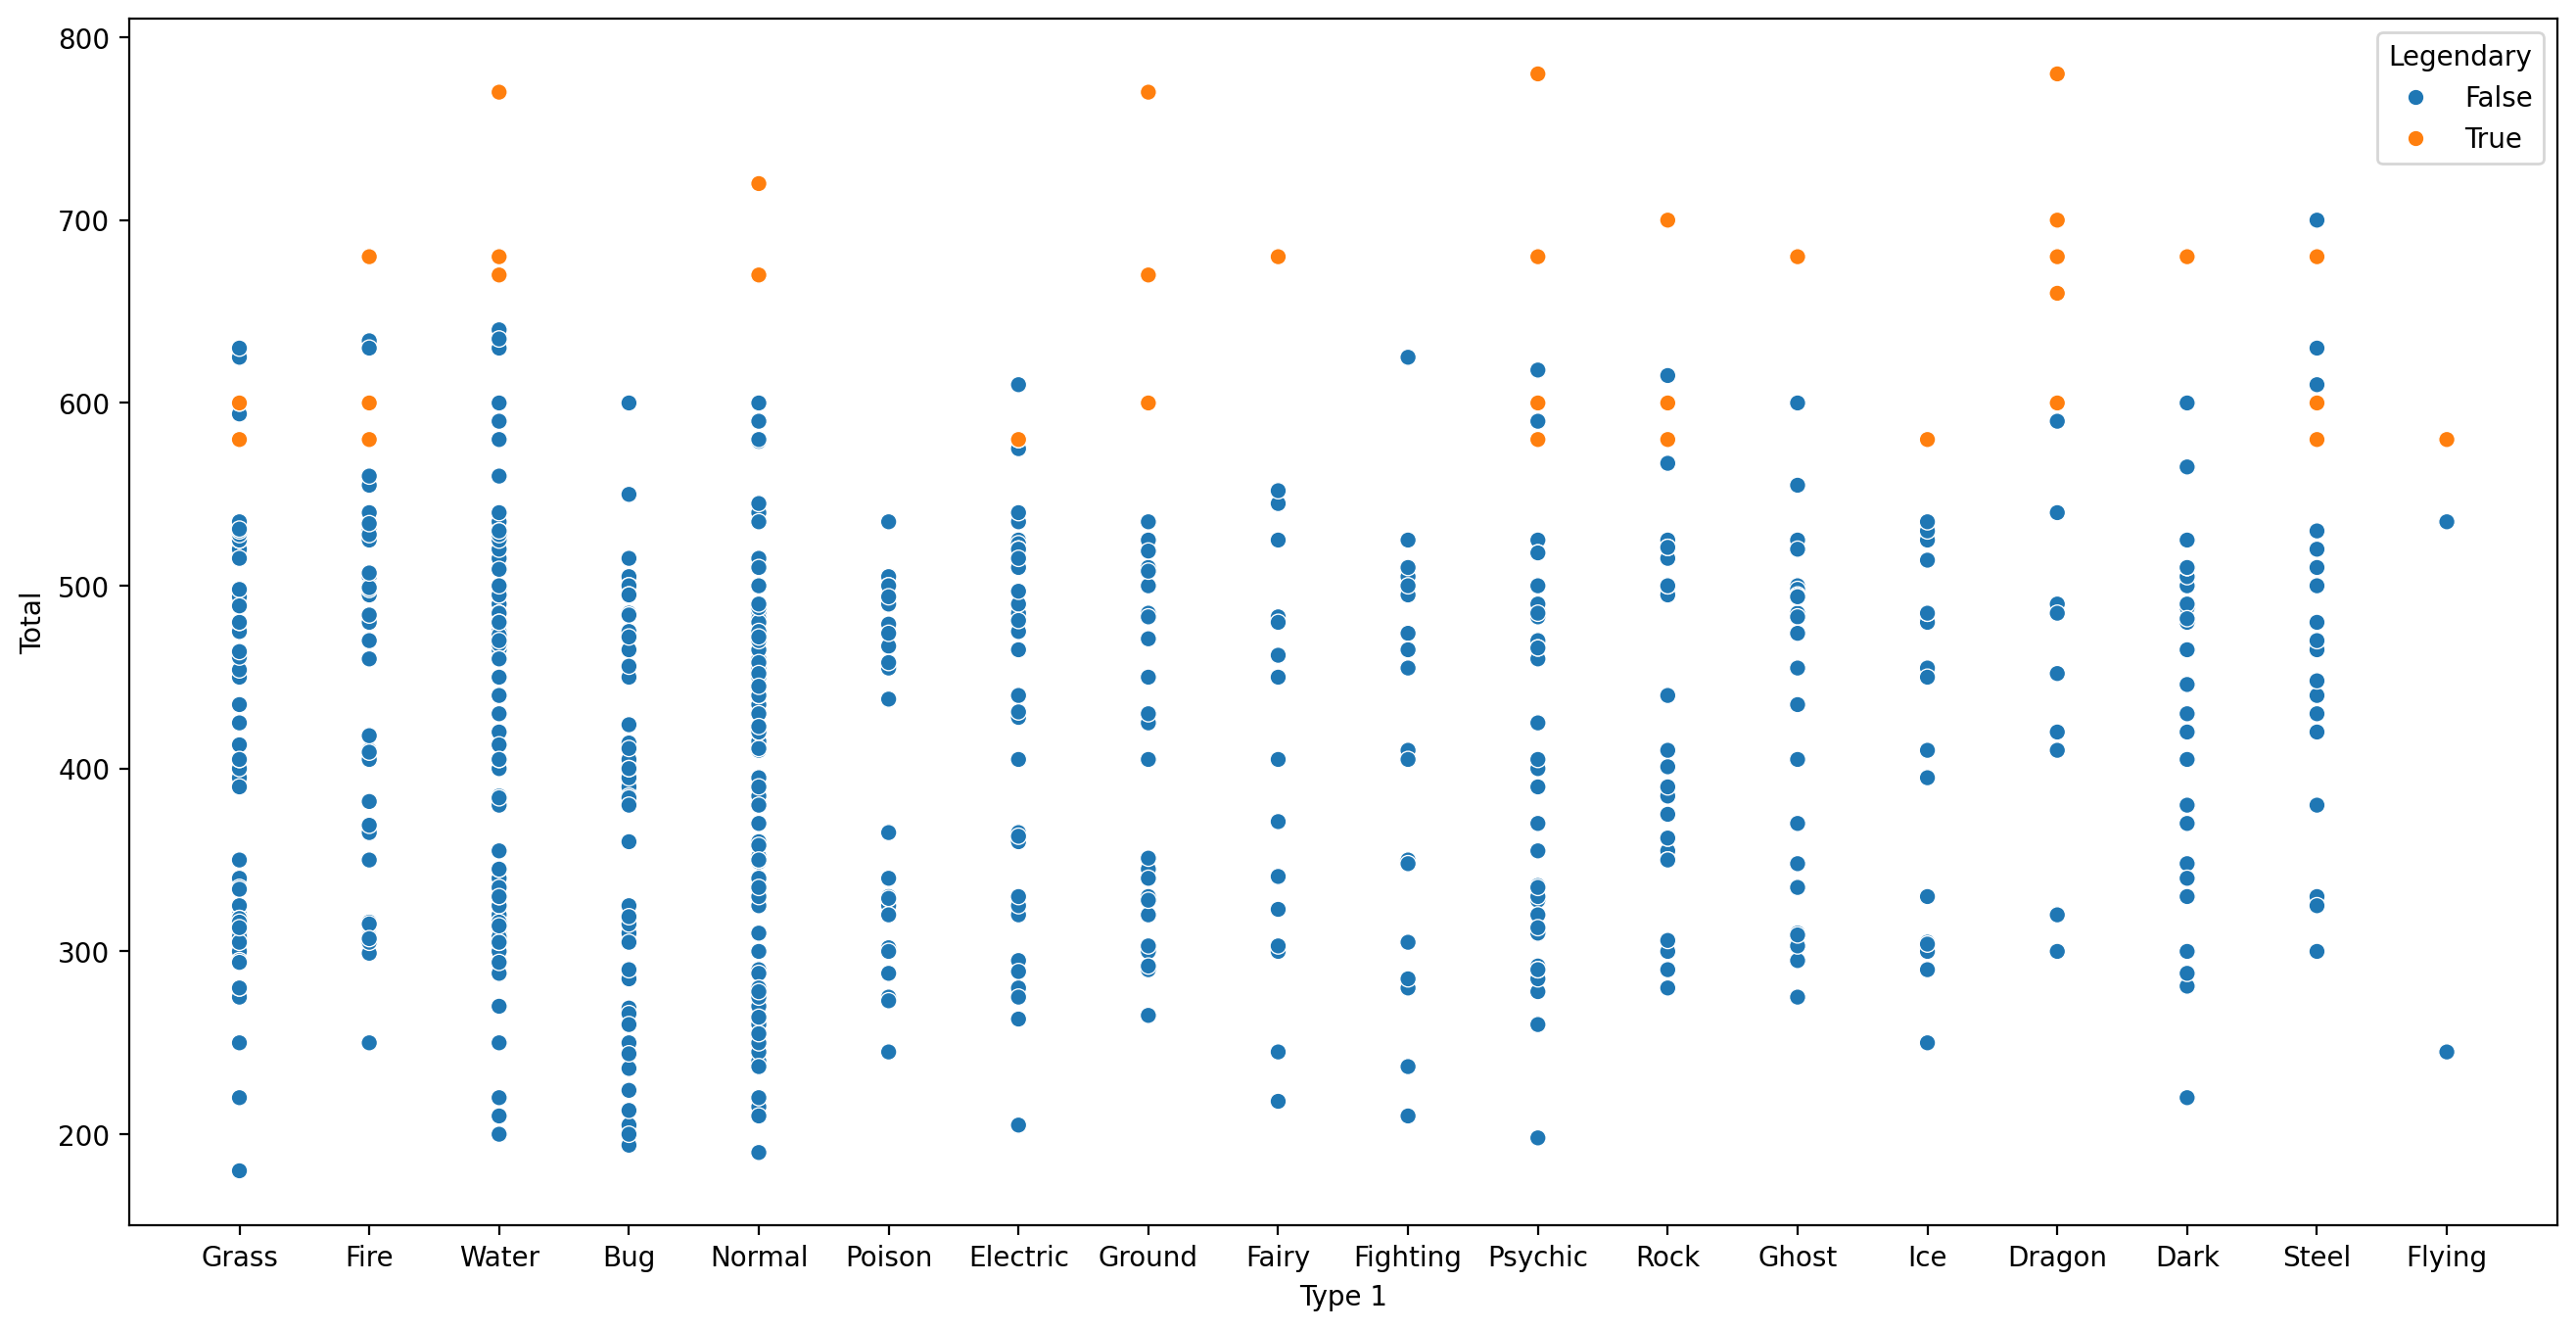

In [35]:
# 속성별 Total값을 확인해보자
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

**대부분 전설 포켓몬의 Total 값이 높은 것을 확인할 수 있다.**

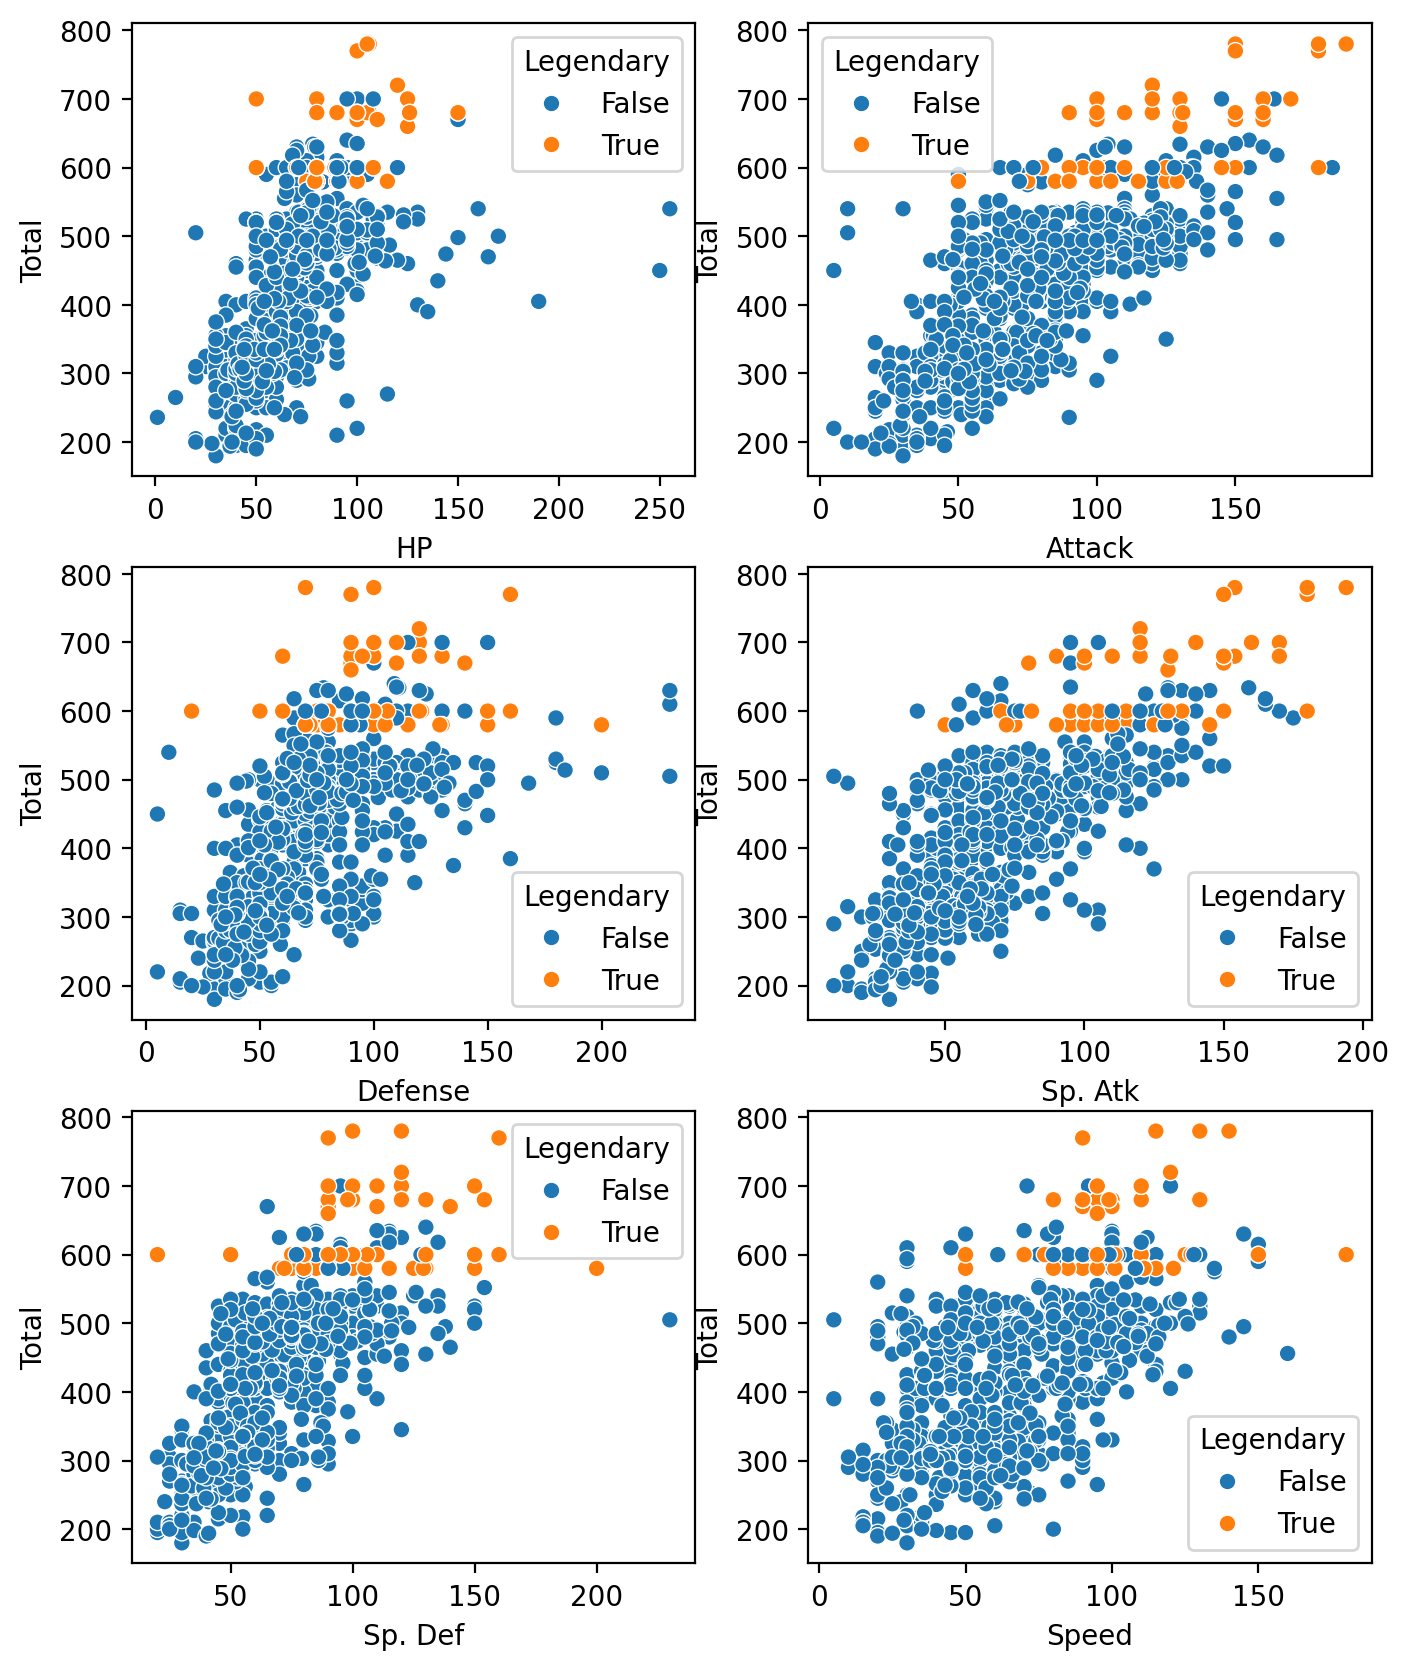

In [38]:
# 각각의 모든 스탯을 확인하여 전설포켓몬과의 관계를 확인해보자

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(8, 10)

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

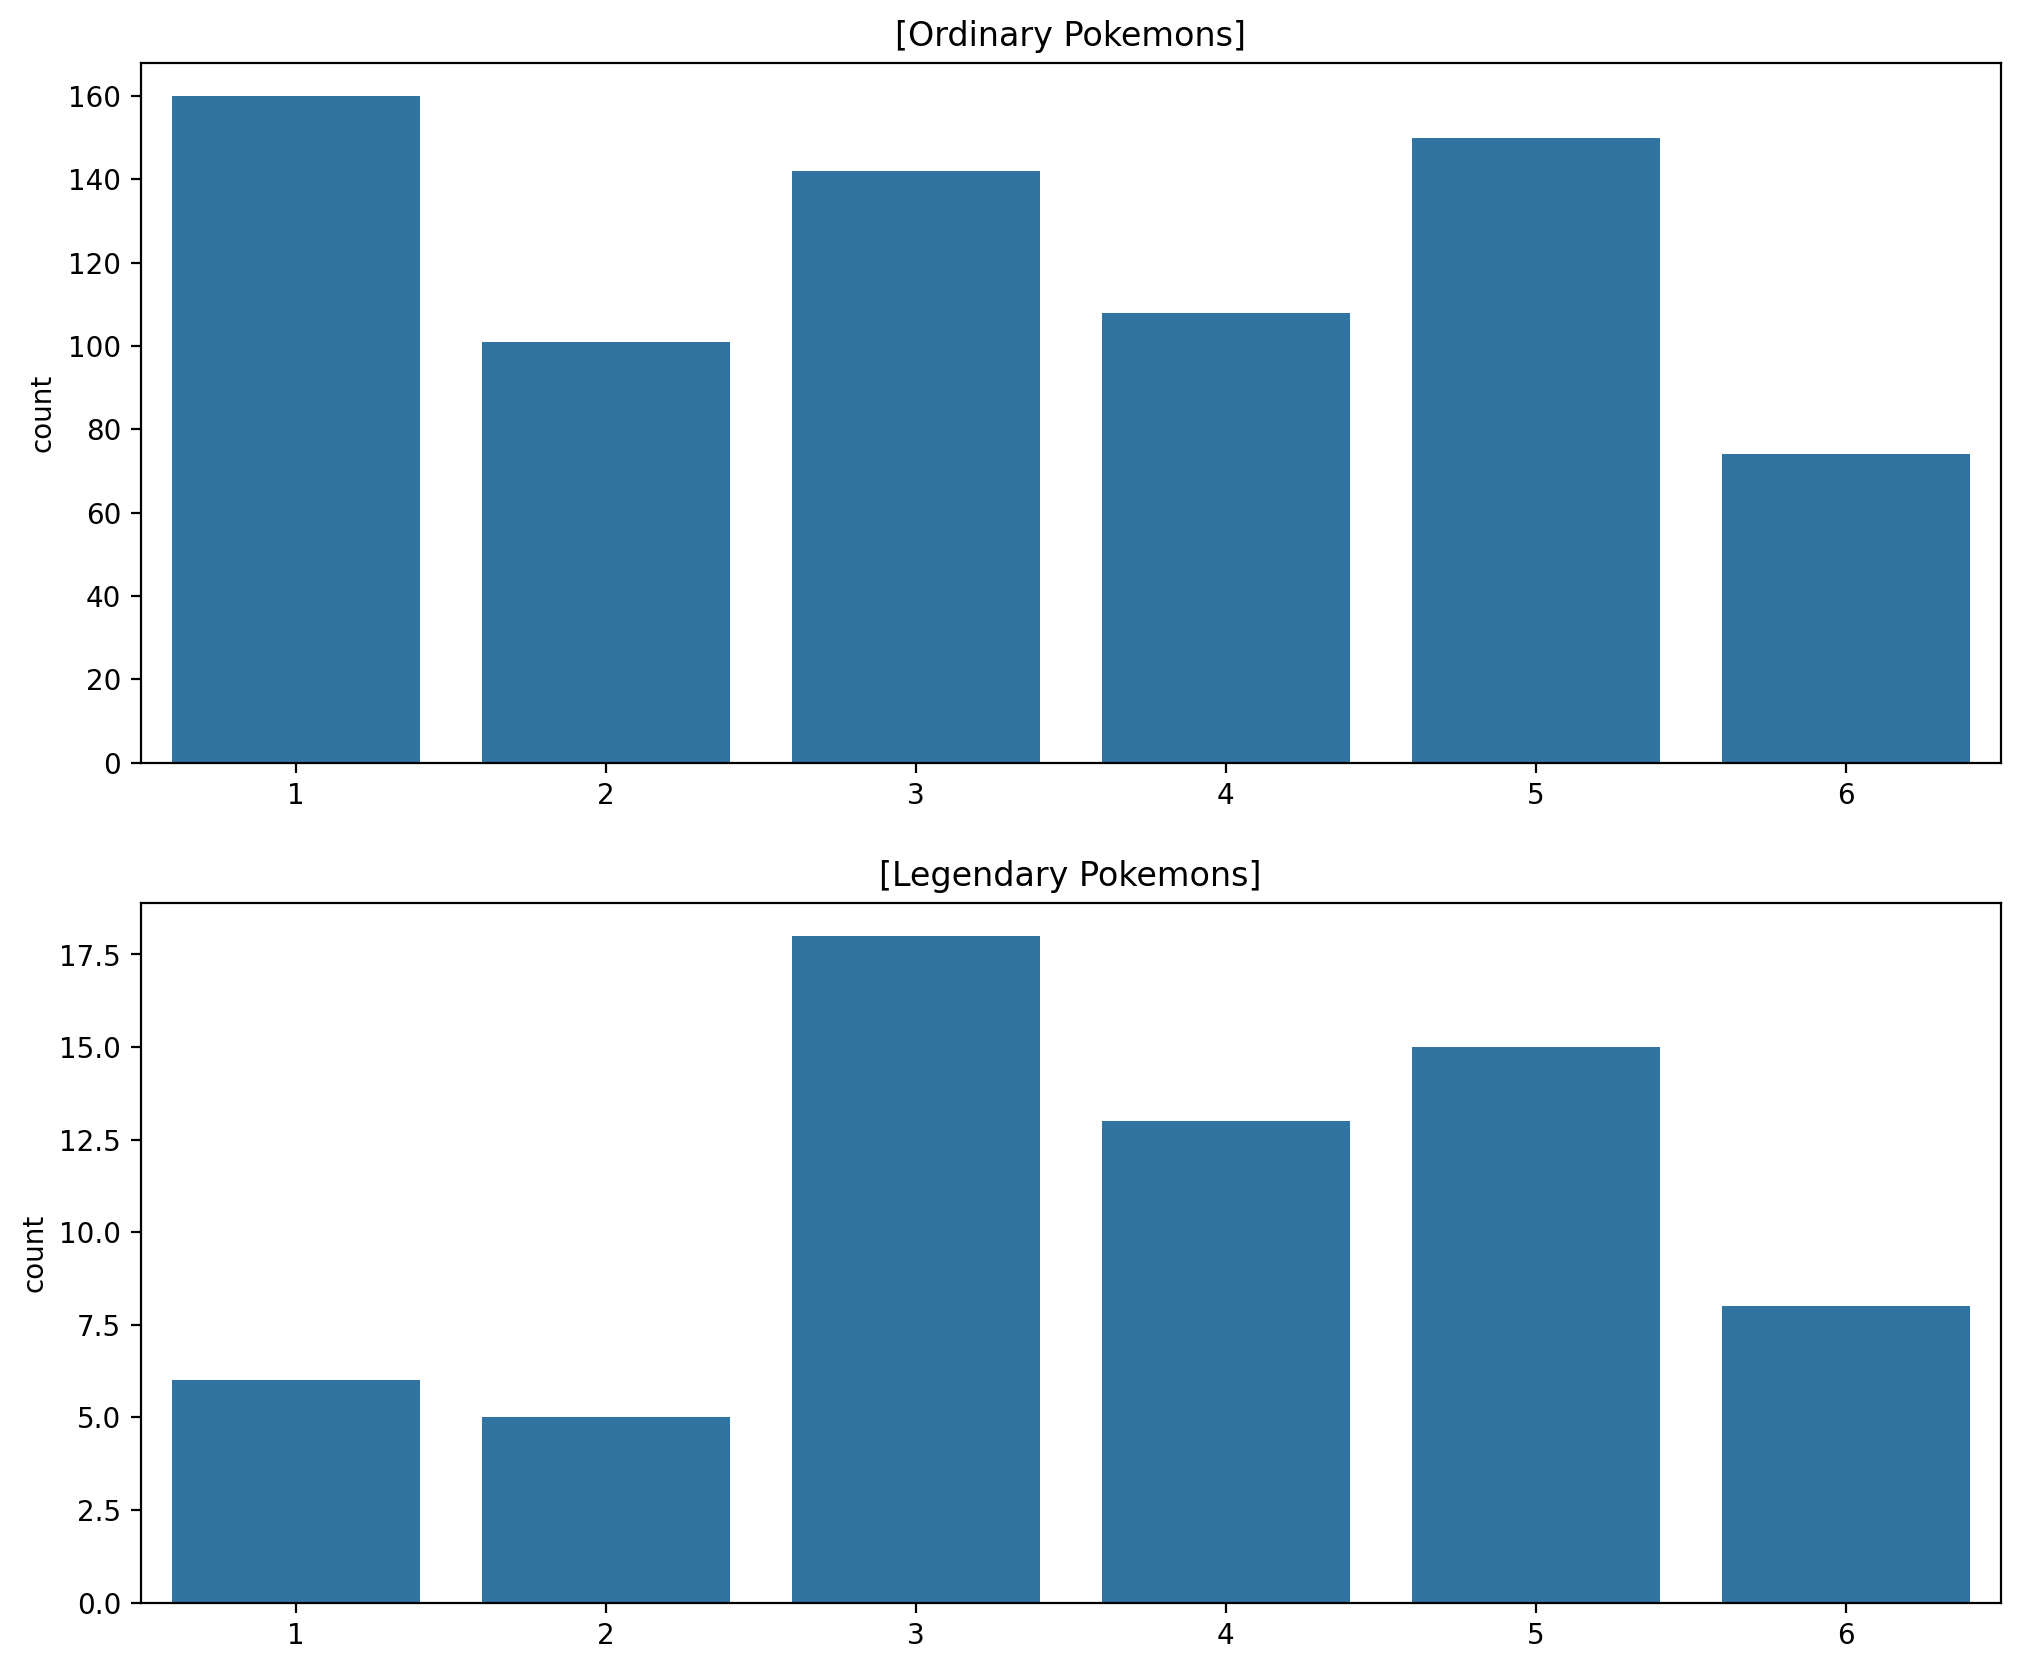

In [39]:
# 포켓몬 세대 확인
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

**1,2세대를 제외한 나머지 세대는 비슷한 비율을 보이고 있다.**

---
#

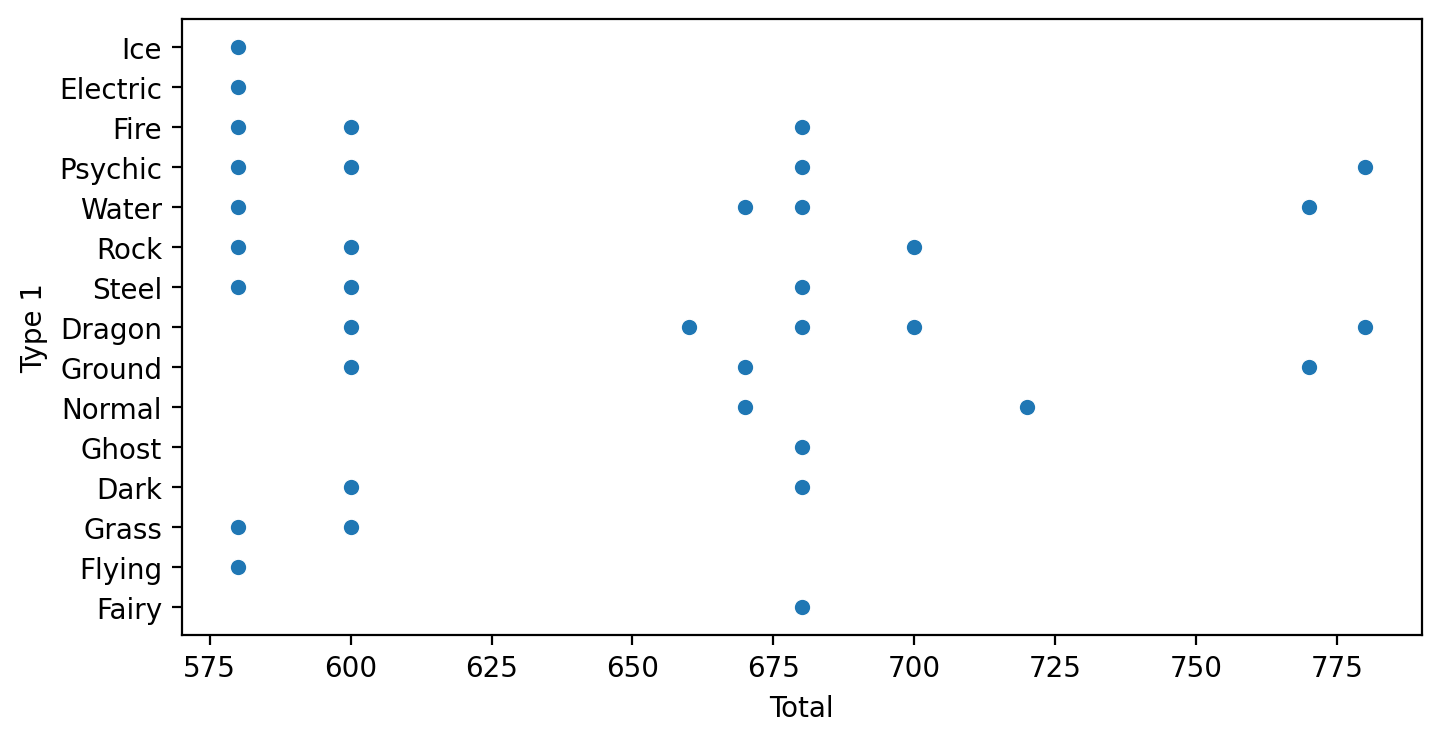

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

**전설 포켓몬들의 Total값이 특정한 값에 몰려있다!**

In [42]:
# set()함수를 사용하여 중복값을 지워주고
# sorted()함수를 사용하여 가독성있게 정렬

print(sorted(set(legendary["Total"])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


**9 개의 값만을 가지고 있다.**

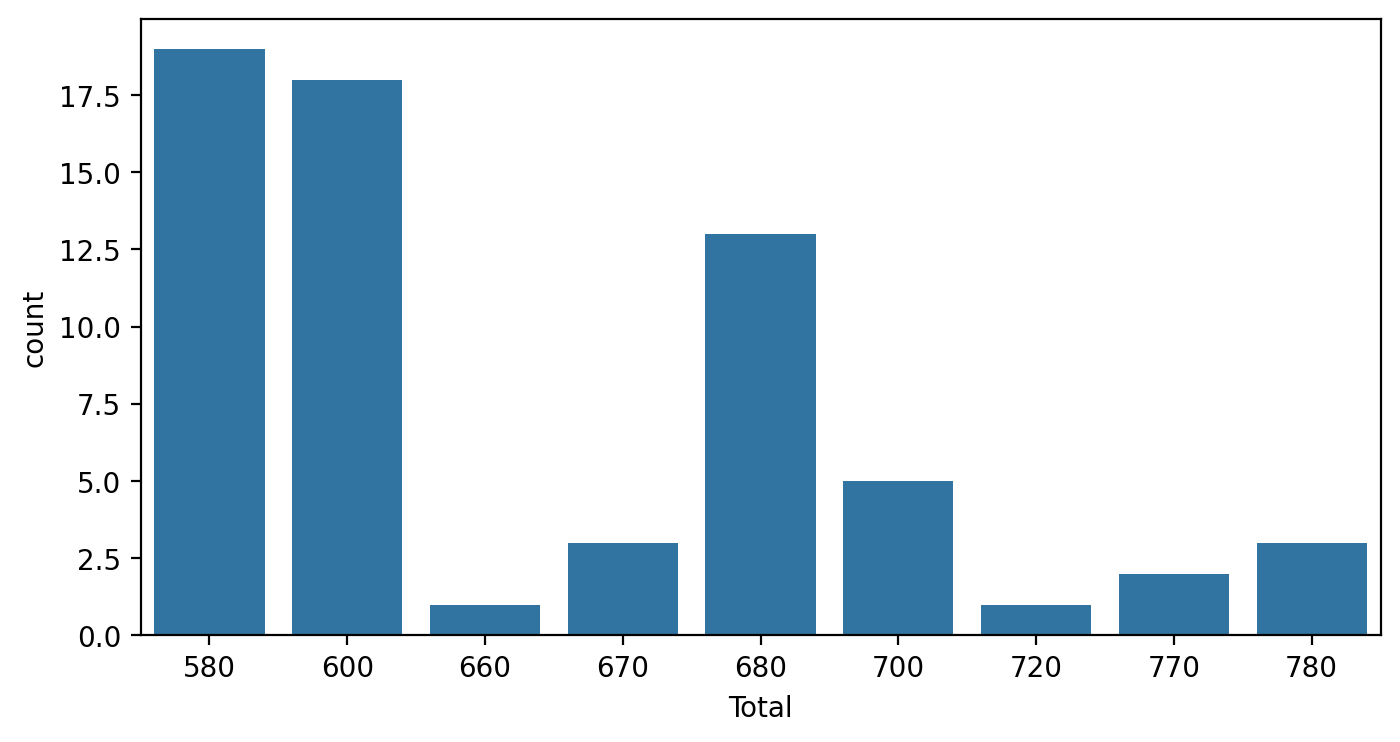

In [43]:
# 분포 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

약 7.22마리 끼리는 같은 Total 스탯 값을 가진다는 의미와 같다.\
하지만 그 분포가 고르지 않아 평균적으로 보기에는 그다지 신뢰성 있다고 보기 어렵다.

In [46]:
# 일반 포켓몬의 'Total' 값 확인
print(sorted(set(ordinary["Total"])))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


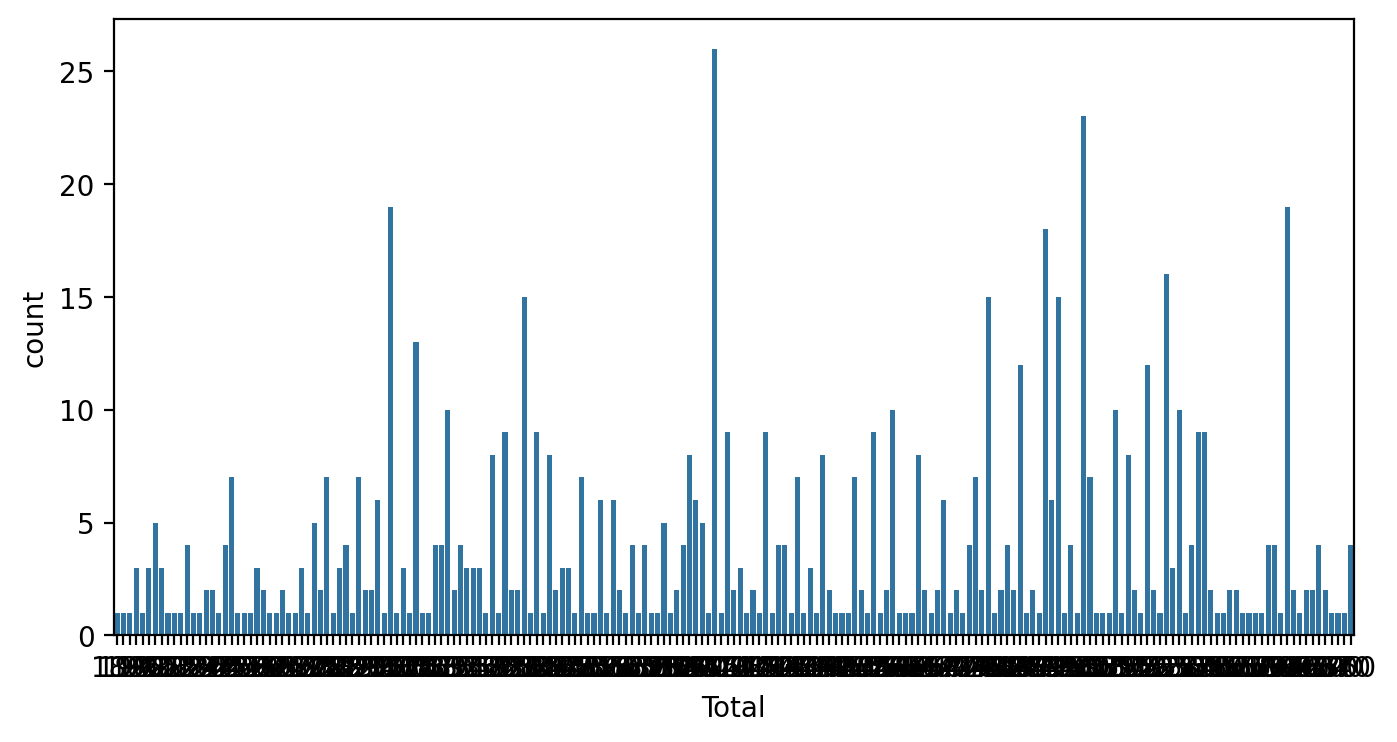

195


In [47]:
# 일반 포켓몬의 'Total'값 분포과 크기(길이) 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=ordinary, x="Total")
plt.show()
print(len(set(ordinary["Total"])))

일반 포켓몬의 수는 800 - 65 = 735마리
735 / 195 = 약 3.77마리가 같은 Total 값을 가진다.

Total값의 다양성은 일반포켓몬(3.77)이 전설포켓몬(7.22)보다 그 개체 수를 고려한다면 두 배 가까이 된다고 볼 수 있다.

한 포켓몬의 Total 속성값이 전설 포켓몬의 값 집합에 포함되는지에 대한 여부는 전설 포켓몬을 예측하는 데에 영향을 줄 수 있다.\
또한 일반 포켓몬이 가지지 못하는 전설 포켓몬의 높은 Total값을 가지는 것도 고려할 수 있다.

In [48]:
# 이름 확인
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


비슷한 이름을 가진 포켓몬들을 확인해보면\
동일한 이름 앞에 조금씩 다른 이름이 붙는다.

특히 Forme가 들어가는 포켓몬의 경우 다양한 포켓몬이 존재한다.

In [49]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


전설 포켓몬의 긴 이름도 하나의 특징이다.

In [50]:
# name_count 컬럼을 만들어 확인
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [51]:
# 기본 포켓몬 데이터에도 적용
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


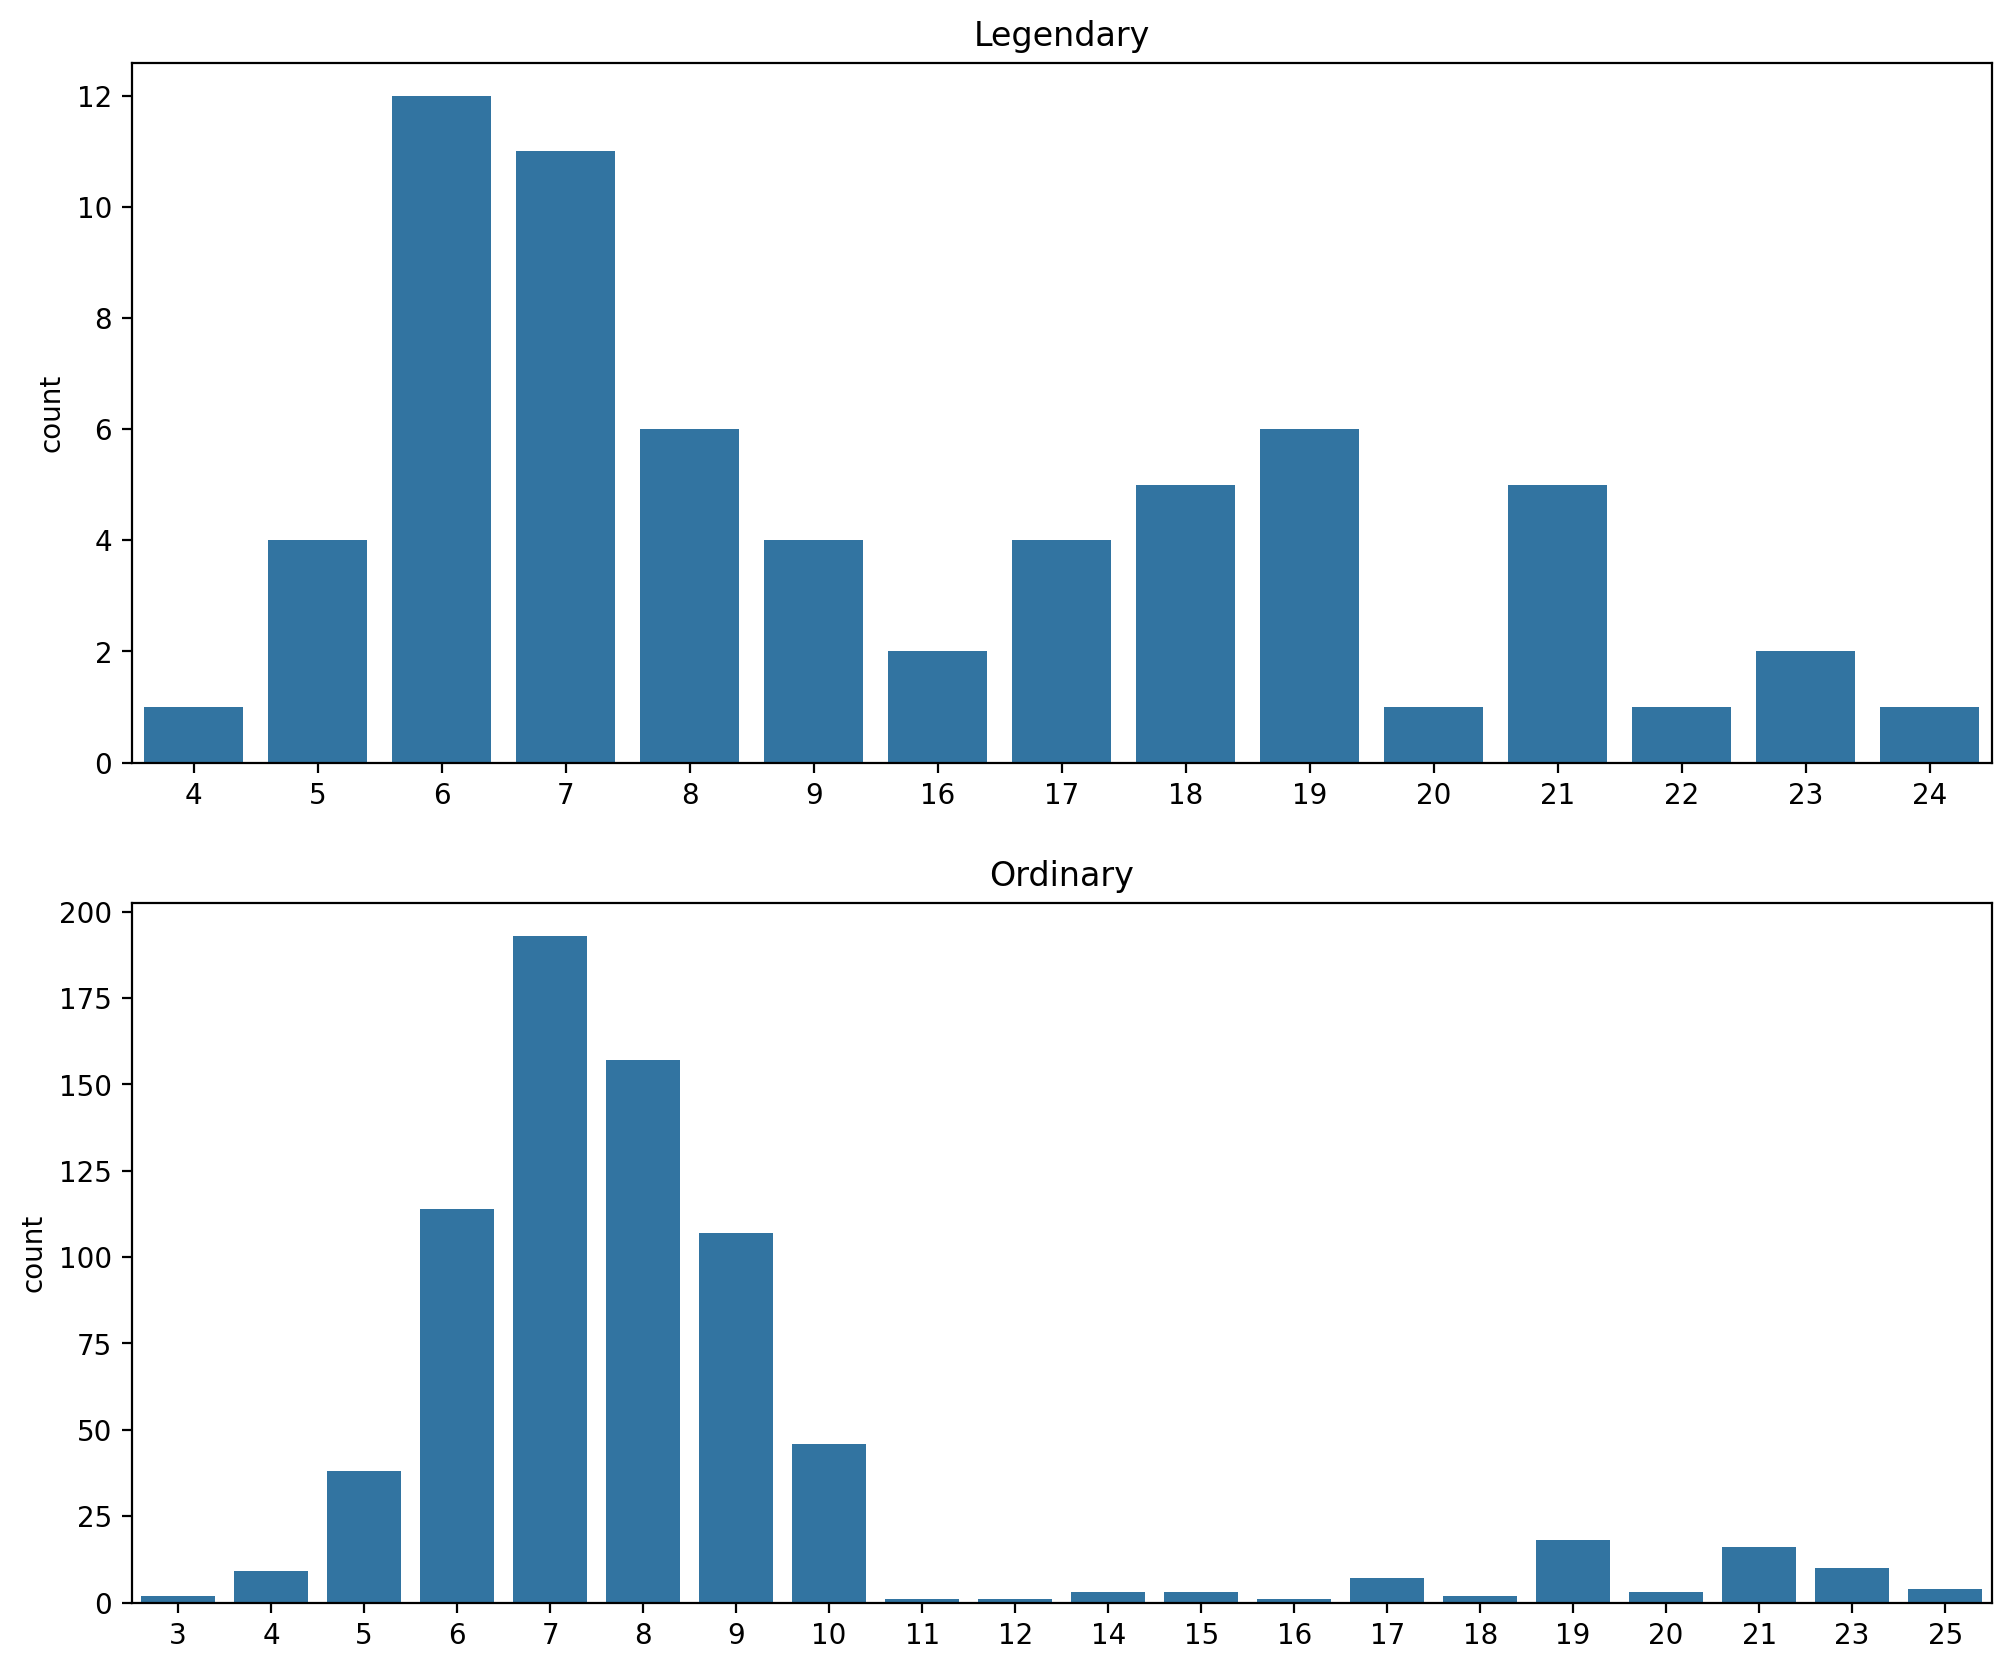

In [52]:
# 이제 각각의 분포를 살펴보자
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [53]:
# 이름의 길이가 10 이상인 포켓몬 비율

print('전설 포켓몬',round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
print('일반 포켓몬', round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

전설 포켓몬 41.54 %
일반 포켓몬 15.65 %


**41%와 15%로 확연한 차이를 보이고 있다.**

---
# 데이터셋 전처리

이름과 stats을 머신러닝 모델에 입력하기 적합하도록 전체 데이터셋을 전처리

1. 이름의 길이

In [54]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [55]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


2. 이름에 자주 쓰이는 토큰

 포켓몬 이름 4가지 패턴
 1. 한 단어면 ex. Venusaur
 2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 \
 ex. VenusaurMega Venusaur
 3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 \
 ex. CharizardMega Charizard X
 4. 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

In [56]:
# 알파벳이 아닌 문자가 들어간 이름 전처리
# 문자열이 알파벳으로만 이루어져 있는지 확인하고 싶으면 isalpha()함수를 사용하여 처리
# 근데 이름에 띄어쓰기가 포함된 경우에도 isalpha() == False로 처리됨
# 따라서 띄어쓰기를 ""으로 replace()함수를 사용하여 대체한다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [57]:
# 이제 isalpha()함수를 사용하여 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [58]:
# 문자가 포함된 것들 확인

print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


**9마리 확인**

In [59]:
# 몇 마리 없으니 직접 변환

pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [61]:
# 모두 변환해주었으므로 다시 이름에 알파벳이 아닌 문자가 있는지 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())

pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


**False인 컬럼이 하나도 없다.\
=> 모든 이름이 알파벳만으로 이루어짐**

---
이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기

정규 표현식: 문자열 처리 기법\
특정 조건을 만족하는 문자 검색, 치환 등의 작업 가능\
re 패키지에서 지원

=> 띄어쓰기나 특정 패턴이 들어간 이름을 적절히 쪼개서 리스트로 작성

In [62]:
import re

In [63]:
name = "CharizardMega Charizard X"
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [64]:
# 첫 번째 요소 temp에 저장
temp = name_split[0]
temp

'CharizardMega'

In [65]:
# 대문자로 시작하여 소문자로 끝나는 토큰 분리
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

+) 정규표현식 의미
* [A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
* [a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
* : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)


In [66]:
# 토큰화
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [67]:
# 토큰화 코드 함수화

def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [68]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [69]:
# 전설 포켓몬 이름에 적용

all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [70]:
# Counter 객체를 사용하여 많이 사용된 토큰 확인
from collections import Counter

# most_common을 활용하여 value값을 기준으로 정렬
#가장 많이 사용된 10개 추려보기
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

**Forme가 15번\
Mega가 6번 들어감.**

In [71]:
# 각 토큰이 이름에 쓰이는지 확인
# str.contains()함수 사용

for token, _ in most_common:
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [72]:
# 범주형 데이터 전처리
# 원핫 인코딩

for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Poison,Ground,Rock,Ghost,Bug,Fire,Fairy,Steel,Dragon,Normal,Water,Flying,Fighting,Dark,Grass,Electric,Ice,Psychic
0,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,Fire,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


**0번 포켓몬의 경우 Grass와 Poison 컬럼에만 True값을 가짐**

In [73]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Dragon,Normal,Water,Flying,Fighting,Dark,Grass,Electric,Ice,Psychic
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,True,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,True,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,True,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,False,False,False,False,True,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,False,False,False,False,False,False,False,False,False,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,False,False,False,False,False,False,False,False,False,False
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,False,False,False,False,False,False,False,False,False,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,False,False,False,False,False,True,False,False,False,True


---
# 베이스라인 생성

In [74]:

# 입력 데이터와 target(예측할) 데이터 생성
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'
X = original_data[features]
y = original_data[target]

In [75]:
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [76]:
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [77]:
# 훈련 데이터와 학습 데이터 분리 및 생성

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


---
# 모델 학습

In [78]:
# 의사 결정 트리

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [79]:
# model fit (모델 학습 진행)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [80]:
# 평가
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

**[[TN, FP],\
[FN, TP]]**

여기서 의미하는 Positive(Legendary = True)는 전설 포켓몬을 의미한다.\
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우

\

정확도: 95%로 높은 값을 가짐.\
그러나 해당 데이터셋은 target데이터인 전설 포켓몬의 수가 적으므로
클래스 불균형이라는 문제점을 가지고 있는 데이터셋이다.\
따라서 정확도만으로 판단하는 것은 의미가 없다.

In [81]:
# 다른 평가지표 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



재현율의 True값이 62%로 성능이 현저히 떨어짐

In [82]:
# feature engineering 데이터로 모델 학습

features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']
target = "Legendary"
X = pokemon[features]
y = pokemon[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [83]:
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



**재현율에서 True값이 92%로 feature engineering을 통해 성능이 향상됨을 확인**

---
# 회고

코드를 해석하고 데이터셋의 값들을 분석하고 주석을 적어가며 진행하니 결과값을 얻는 것만으로도 생각보다 시간이 오래걸렸다.

모델을 구성하는 것보다 데이터를 이해하여 모델을 학습시키는 것이 매우 중요한 작업임을 알았고
그렇기 때문에 특성공학이라는 용어도 나오지 않았나 싶다.